In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import sys

sys.path.append("..")
%matplotlib nbagg

In [2]:
import mplp

In [3]:
help(mplp)

Help on package mplp:

NAME
    mplp

DESCRIPTION
    The mplp is a simple helper class for plotting figure with matplotlib with
    latex rendering:
        - predefined figure dimentions
        - color palette

PACKAGE CONTENTS
    mfig

CLASSES
    builtins.object
        mplp.mfig.Mfig
    
    class Mfig(builtins.object)
     |  Example
     |  -------
     |  >>> import mplp
     |  >>> from palettable.colorbrewer.sequential import Blues_8
     |  >>> mfig = mplp.Mfig('normal', colors=Blues_8)
     |  >>> fig, ax = mfig.subplots()
     |  >>> ax.plot(x, y, '-')
     |  >>> mfig.savefig("plot.pdf")
     |  
     |  Notes
     |  -----
     |  .. _The palettable documentation:
     |  https://jiffyclub.github.io/palettable/
     |  
     |  .. _Colorbrewer:
     |  http://colorbrewer2.org/
     |  
     |  Methods defined here:
     |  
     |  __init__(self, format=None, scale=0.9, formatting='landscape', column=1, colors=None, fontsize=None)
     |      Constructor
     |      


## Method of Newton-Raphson

$$ 
S = 1 – e^{-\langle k \rangle S}  \\
1 - e^{-\langle k \rangle S} - S = 0
$$

In [4]:
def f(x, u):
    return 1 - np.exp(-u*x) - u

def derivative(f, x1, x2, u):
    df = (f(x2, u) - f(x1, u))/(x2-x1)
    return df

def newton(f, u, accuracy):
    x = 1e-3
    delta = 1e-3
    while abs(delta) > accuracy:
        delta = f(x, u)/derivative(f, x, x + delta, u)
        x -= delta
    return x

<IPython.core.display.Javascript object>


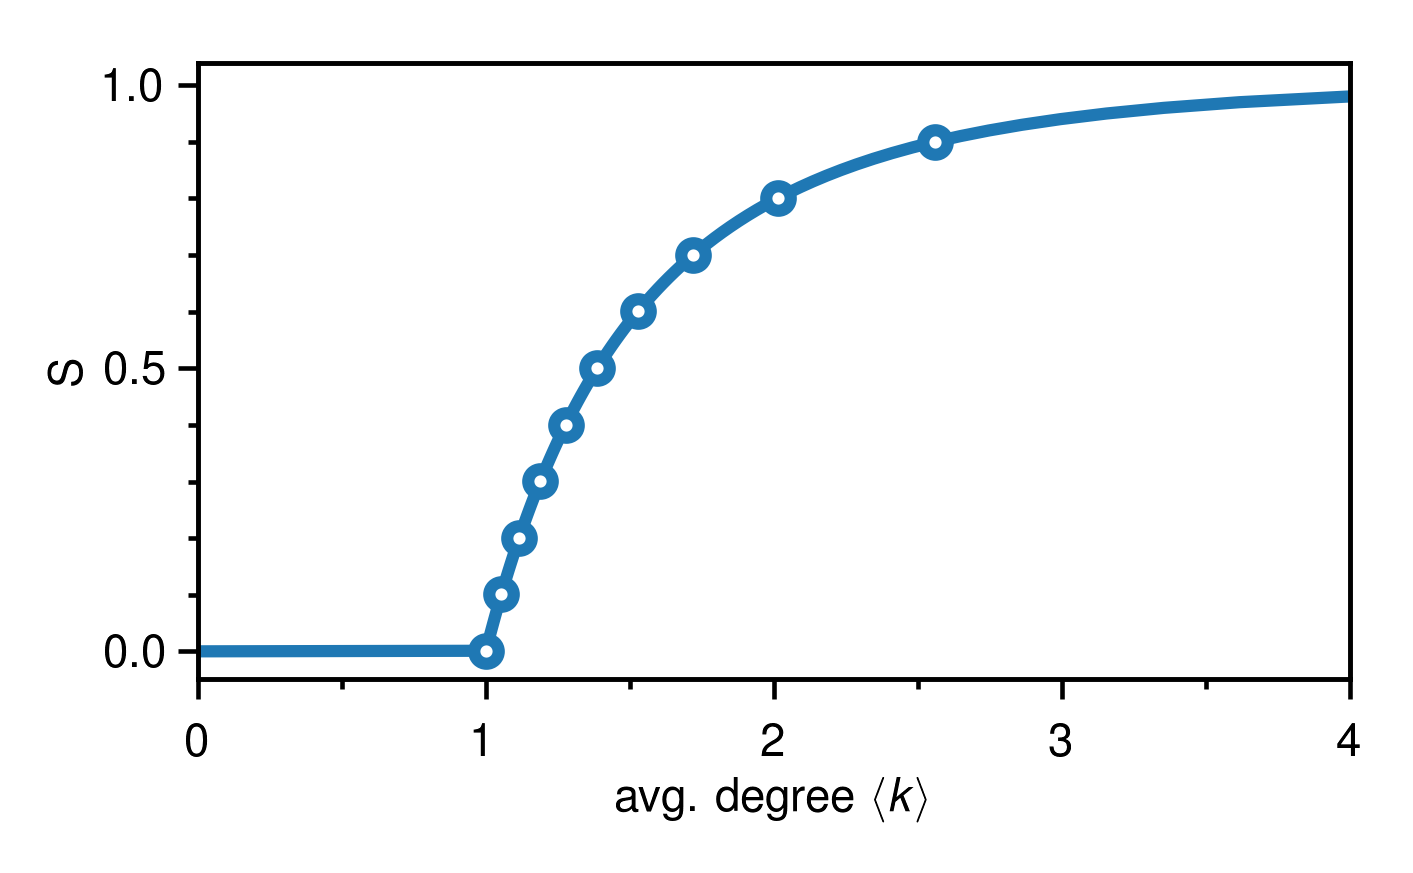

In [5]:
accuracy = 1e-12
upoints = np.linspace(0.001, 0.99, 100)
xpoints = []

for u in upoints:
    xpoints.append(newton(f, u, accuracy))

np.array(xpoints)
xpoints = np.insert(xpoints, 0, 0)
upoints = np.insert(upoints, 0, 0)

mfig = mplp.Mfig(format="single", formatting="landscape")
fig, ax = mfig.subplots()
colors = mfig.get_color_cycle()

ax.plot(xpoints, upoints,'-', lw=4, color=colors[1])
ax.plot(xpoints[range(1, 100, 10)], upoints[range(1,100, 10)], 'o', 
        ms=8,
        markerfacecolor='white',
        markeredgecolor=colors[1],
        markeredgewidth=4,
        clip_on=False, 
        zorder=100)

yminor_locator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(yminor_locator)
ax.yaxis.set_ticks(np.arange(0, 1.5, 0.5))
ax.set_xlim(0, 4.0)
ax.set_ylabel(r"S")

xminor_locator = AutoMinorLocator(2)
ax.xaxis.set_ticks(np.arange(0, 5, 1.0))
ax.xaxis.set_tick_params(pad=8)
ax.xaxis.set_minor_locator(xminor_locator)
ax.set_xlabel(r"avg. degree $\left< k \right>$")

mfig.savefig("fig1")

<IPython.core.display.Javascript object>


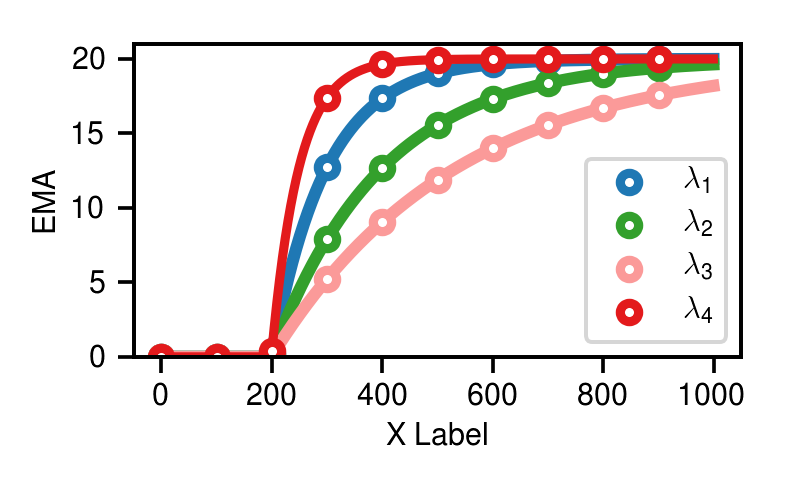

In [6]:
def ema(y, a):
    s = []
    s.append(y[0])
    for t in range(1, len(y)):
        s.append(a * y[t] + (1-a) * s[t-1])
    return np.array(s)


mfig = mplp.Mfig(format='double', formatting='landscape')
fig, ax = mfig.subplots()
colors = mfig.get_color_cycle()

y = [0]*200
y.extend([20]*(1000-len(y)))

s = ema(y, 0.01)

ax.plot(s, lw=4, color=colors[1])
ax.plot(s,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[1],
        markeredgewidth=3,
        label="$\lambda_1$",
        markevery=100)

s = ema(y, 0.005)
ax.plot(s, lw=4, color=colors[3])
ax.plot(s,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[3],
        markeredgewidth=3,
        markevery=100,
        label="$\lambda_2$")

s = ema(y, 0.003)
ax.plot(s, lw=4, color=colors[4])
ax.plot(s,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[4],
        markeredgewidth=3,
        markevery=100,
        label="$\lambda_3$")

s = ema(y, 0.02)
ax.plot(s, lw=3, color=colors[5])
ax.plot(s,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[5],
        markeredgewidth=3,
        markevery=100,
        label="$\lambda_4$")
ax.set_xlabel('X Label')


ax.set_ylim(0, 21)
ax.set_ylabel('EMA')
ax.legend()
mfig.savefig('output')

<IPython.core.display.Javascript object>


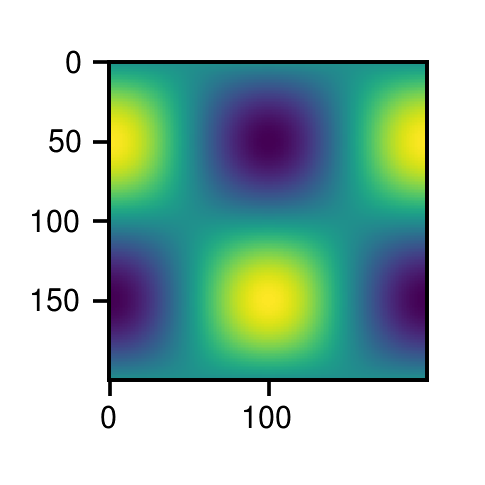

In [7]:
mfig = mplp.Mfig(format='double', formatting='square')
fig, ax = mfig.subplots()
X, Y = np.ogrid[0:2*np.pi:200j, 0:2*np.pi:200j]
data = np.sin(X) * np.cos(Y)
ax.imshow(data, interpolation='none')
mfig.show()

In [8]:
alpha = [( 0 , 129.337640596 ), 
         ( 1 , 221.747974005 ),
         ( 2 , 319.295383135 ),
         ( 3 , 580.040581603 ),
         ( 4 , 760.390571623 ), 
         ( 5 , 225.773698326 ),
         ( 6 , 138.976110493 ),
         ( 7 , 84.8514398032 ),
         ( 8 , 59.8073880206 )]

beta = [( 0 , 0.883846869442 ),
        ( 1 , 0.88281528979 ),
        ( 2 , 0.903392589946 ),
        ( 3 , 0.875767624917 ),
        ( 4 , 0.793315851691 ),
        ( 5 , 1.02597728308 ),
        ( 6 , 0.999953325544 ),
        ( 7 , 0.954830293886 ),
        ( 8 , 0.92921917187 )]

In [9]:
x_alpha = []
y_alpha = []
x_beta = []
y_beta = []
for xx,yy in alpha:
    x_alpha.append(xx)
    y_alpha.append(yy)
    
for xx,yy in beta:
    x_beta.append(xx)
    y_beta.append(yy)

<IPython.core.display.Javascript object>


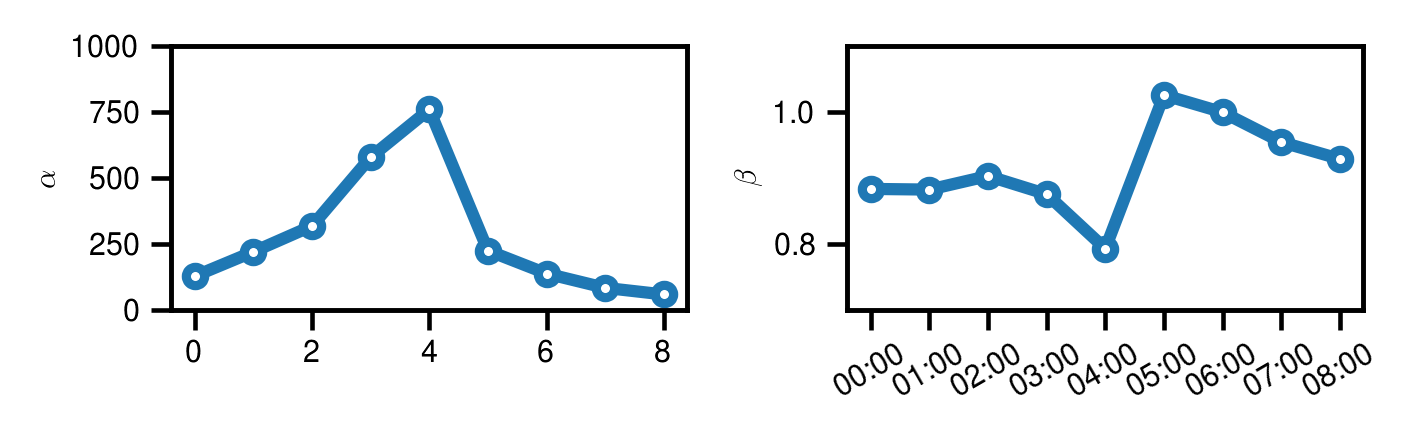

In [10]:
mfig = mplp.Mfig(format='single', formatting='landscape', column=2)
fig, (ax1,ax2) = mfig.subplots(1,2)
colors = mfig.get_color_cycle()

ax1.plot(x_alpha, y_alpha, lw=4, color=colors[1])
ax1.plot(x_alpha, y_alpha,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[1],
        markeredgewidth=3,
        label="$\lambda_1$")
ax1.set_ylabel(r"$\alpha$")
ax1.set_ylim(0,1000)

ax2.plot(x_beta, y_beta, lw=4, color=colors[1])
ax2.plot(x_beta, y_beta,'o',
        ms=6,
        markerfacecolor='white',
        markeredgecolor=colors[1],
        markeredgewidth=3,
        label="$\lambda_1$")
ax2.set_ylabel(r"$\beta$")
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
labels = ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00"]
ax2.set_xticklabels(labels)
labels = ax2.get_xticklabels()
plt.setp(labels, rotation=30)
ax2.set_ylim(0.7,1.1)

mfig.savefig('alpha_beta')